In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append("/local/scratch/js2173/pytorch/Selectively-Retexuring-Subimages/submodules/PSPNet-Keras-tensorflow") # access submodules
# filter out paths added by other users of server...
sys.path = [p for p in sys.path if not p.startswith('/local/scratch') or p.startswith('/local/scratch/js2173')]

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # set to 0 to use GPU if its available

In [4]:
from os.path import splitext, join
import numpy as np
import argparse
from scipy import misc, ndimage
from keras import backend as K
from keras.models import model_from_json, load_model
import tensorflow as tf
import layers_builder as layers
from python_utils import utils
from python_utils.preprocessing import preprocess_img

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from pspnet import PSPNet101


/local/scratch/js2173/pytorch/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
if os.environ["CUDA_VISIBLE_DEVICES"] == '0':
    # release memory when not in use!
    config = tf.ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.Session(config=config)
    K.set_session(sess)

In [18]:
pspnet_path =  '/local/scratch/js2173/pytorch/Selectively-Retexuring-Subimages/submodules/PSPNet-Keras-tensorflow'
filename = "epoch100_real_image.jpg"
#filename = "epoch102_real_image.jpg"
input_path = join('example_images', filename)
input_size = 512
output_path = join('example_results', filename)
model = "pspnet101_cityscapes"

In [8]:
#sess = tf.Session()
#K.set_session(sess)

# testing...
# with sess.as_default():
#     img = misc.imread(input_path, mode='RGB')
#     #cimg = misc.imresize(img, (input_size, input_size))
#     pspnet = PSPNet101(nb_classes=19, input_shape=(713, 713), weights_name=model, weights_path=pspnet_path)


#     probs = pspnet.predict(img, flip_evaluation=False)

#     print("Writing results...")
#     cm = np.argmax(probs, axis=2)
#     pm = np.max(probs, axis=2)
    

#     color_cm = utils.add_color(cm)
#     # color cm is [0.0-1.0] img is [0-255]
#     alpha_blended = 0.5 * color_cm * 255 + 0.5 * img
#     filename, ext = splitext(output_path)
#     misc.imsave(filename + "_seg_read" + ext, cm)
#     misc.imsave(filename + "_seg" + ext, color_cm)
#     misc.imsave(filename + "_probs" + ext, pm)
#     misc.imsave(filename + "_seg_blended" + ext, alpha_blended)


In [9]:
cityscapes_id_to_name = {
    0 : "road",
    1 : "sidewalk",
    2 : "building",
    3 : "wall",
    4 : "fence",
    5 : "pole",
    6 : "light",
    7 : "sign",
    8 : "vegetation",
    9 : "terrain",
    10 : "sky",
    11 : "person",
    12 : "rider",
    13 : "car",
    14 : "truck",
    15 : "bus",
    16 : "train",
    17 : "motocycle",
    18 : "bicycle"
}
cityscapes_name_to_id = dict([(val, key) for (key, val) in cityscapes_id_to_name.items()])


def extract_region_mask(image, region_id, pspnet, sess=None):
    if sess is None:
        sess = tf.Session()
        K.set_session(sess)
    
    with sess.as_default():
        probs = pspnet.predict(image, flip_evaluation=False)
        classes = np.argmax(probs, axis=2)
        return classes == region_id


In [10]:
def show_img(im, figsize=(20, 10), ax=None):
    if not ax:
        plt.figure(figsize=figsize)
        imgplot = plt.imshow(im)
    else:
        ax.imshow(im)

In [19]:
img = misc.imread(input_path, mode='RGB')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [20]:
import keras_neural_style_transfer as style_transfer
from keras.preprocessing.image import load_img, img_to_array
st = style_transfer.NeuralStyleTransfer()

In [74]:
style_image = misc.imread('styles/yellow_bricks.png')[:, :, :3]
target_width = 750
iters = 10
target_height = int(img.shape[0] * target_width / img.shape[1])
target_shape = (target_height, target_width)
print(target_shape)

(375, 750)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [22]:
#print(transferred.shape)
pspnet = PSPNet101(nb_classes=19, input_shape=(713, 713), weights_name=model, weights_path=pspnet_path)


/local/scratch/js2173/pytorch/Selectively-Retexuring-Subimages/submodules/PSPNet-Keras-tensorflow/weights/keras/pspnet101_cityscapes.h5
Keras model & weights found, loading...


In [23]:

resized_img = misc.imresize(img, target_shape)
mask = extract_region_mask(resized_img, 0, pspnet, sess=sess)
print(mask.shape)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Predicting...


/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Finished prediction...
(375, 750)


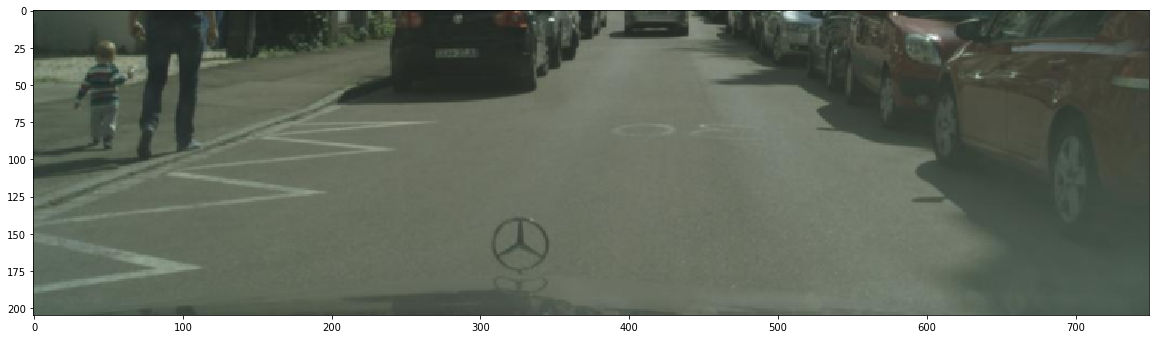

205 750
Model loaded.
Start of iteration 0
Current loss value: 1663170400000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 5s
Start of iteration 1
Current loss value: 51083510000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 4s
Start of iteration 2
Current loss value: 11810067000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 4s
Start of iteration 3
Current loss value: 5158962000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 4s
Start of iteration 4
Current loss value: 3306200600.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 4s
Start of iteration 5
Current loss value: 2271837000.0
Image saved as restyled_at_iteration_5.png
Iteration 5 completed in 4s
Start of iteration 6
Current loss value: 1787016300.0
Image saved as restyled_at_iteration_6.png
Iteration 6 completed in 4s
Start of iteration 7
Current loss value: 1489663900.0
Image saved as restyled_at_iteration_7.png
I

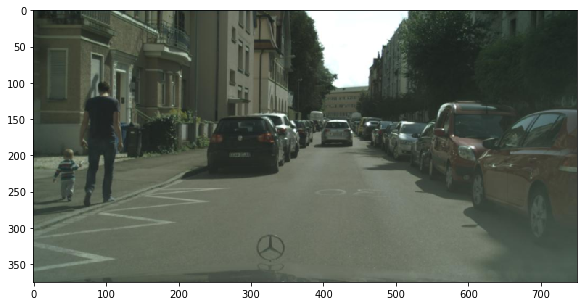

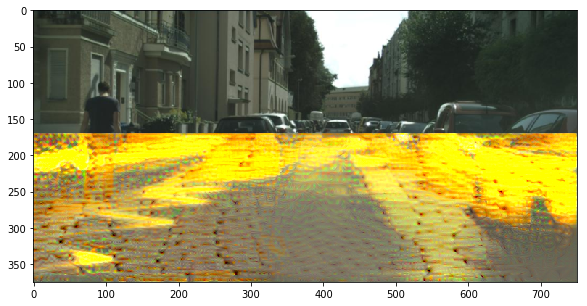

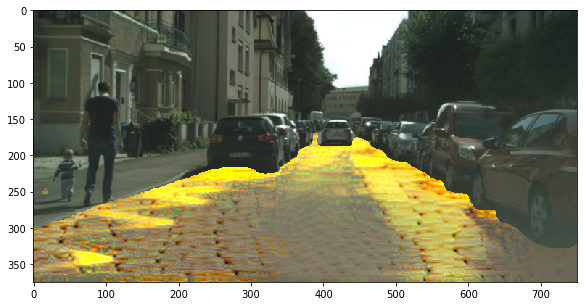

In [90]:
import keras_neural_style_transfer as style_transfer
from keras.preprocessing.image import load_img, img_to_array
st = style_transfer.NeuralStyleTransfer(style_weight=100, total_variation_weight=0, content_weight=0.01)
# black out non-semantic regions
black_out = resized_img.copy()
# fill with mean black
#black_out[~mask] = 0
# fill mean mean color
#mean_color = np.mean(black_out[~mask], axis=(0,1))
#black_out[~mask] = mean_color

layer_configs = [
#    [1, 2, 3, 4],
#    [2,3,4,5],
#    [3,4,5,6],
#    [6,7,8,9],
#    [7,8,9,10],
    #[1,2, 8,9,10,11], # GOOD starting point!
    #[0, 8, 10, 12, 14], # relatively similar

   [ 1, 2, 14,15, 17, 18], # BEST
    
#    [11, 12, 13, 14],
#    [14, 15, 16, 17],
]

i, j = np.where(mask)
indices = np.meshgrid(np.arange(min(i), max(i) + 1),
                      np.arange(min(j), max(j) + 1),
                      indexing='ij')
sub_image = black_out[indices]
show_img(sub_image)
plt.show()

for config in layer_configs:
    sub_image_retextured = st.transfer(sub_image, style_image, target_width=target_width, 
                                        iters_override=10)#, layers=config)
    black_out[indices] = sub_image_retextured
    black_out_transferred = black_out
    show_img(resized_img, figsize=(10,5))
    show_img(black_out_transferred, figsize=(10,5))
    restyled_copy = black_out_transferred.copy()
    orig_resized = resized_img.copy()
    orig_resized[mask] = restyled_copy[mask]
    show_img(orig_resized, figsize=(10,5))
    plt.show()

In [91]:
conv_size = 45
conv = np.array([[1 for _ in range(conv_size)]]*conv_size)
#conv = np.array([[True, True, True],
#                 [True, True, True],
#                 [True, True, True]])

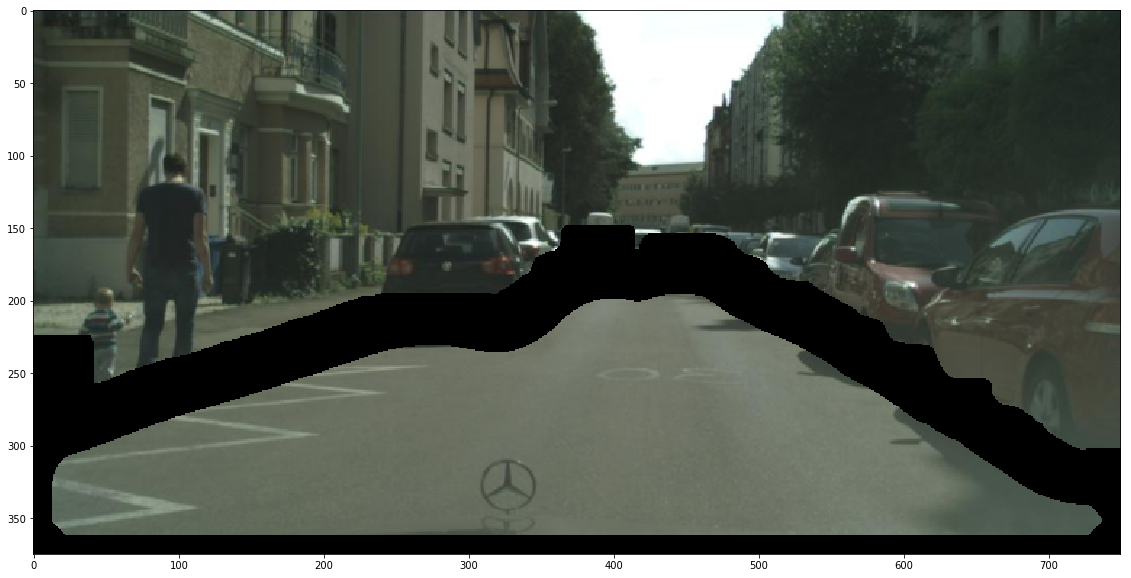

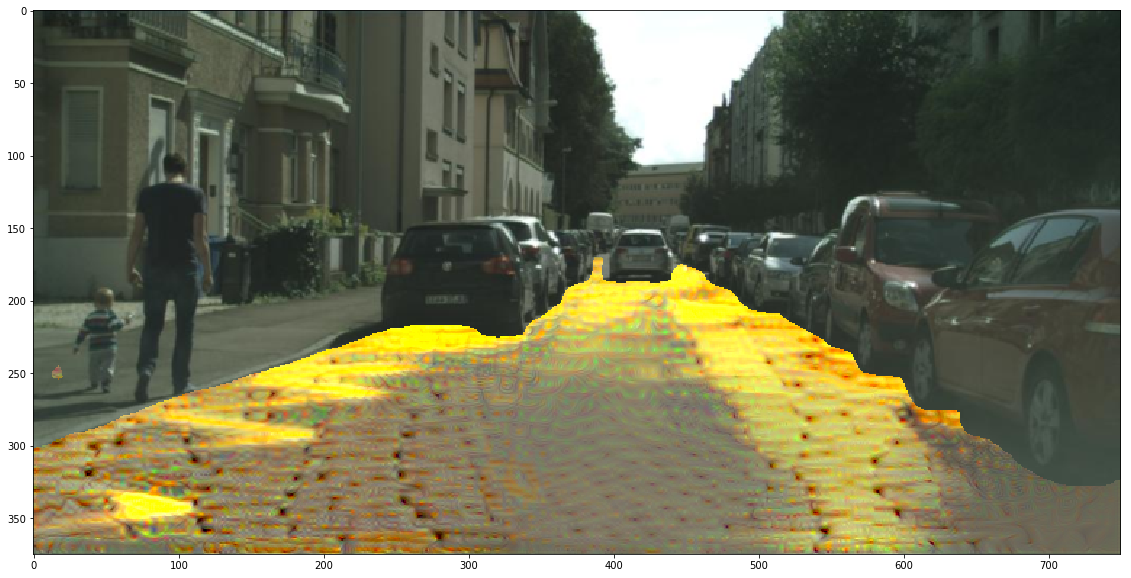

(375, 750)


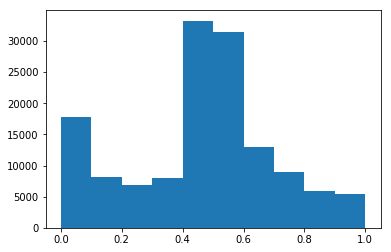

1.0


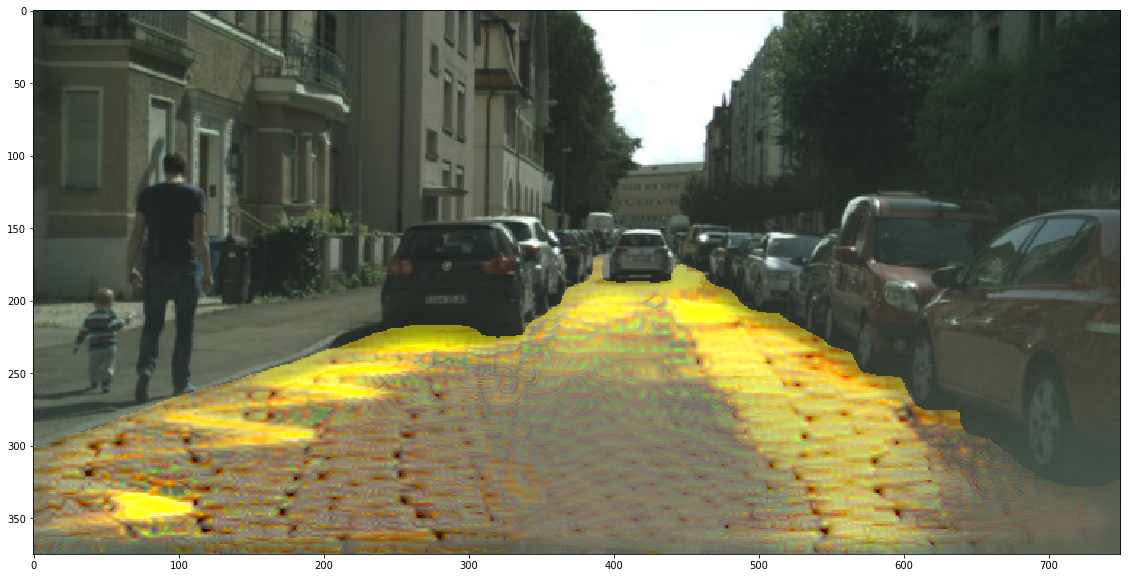

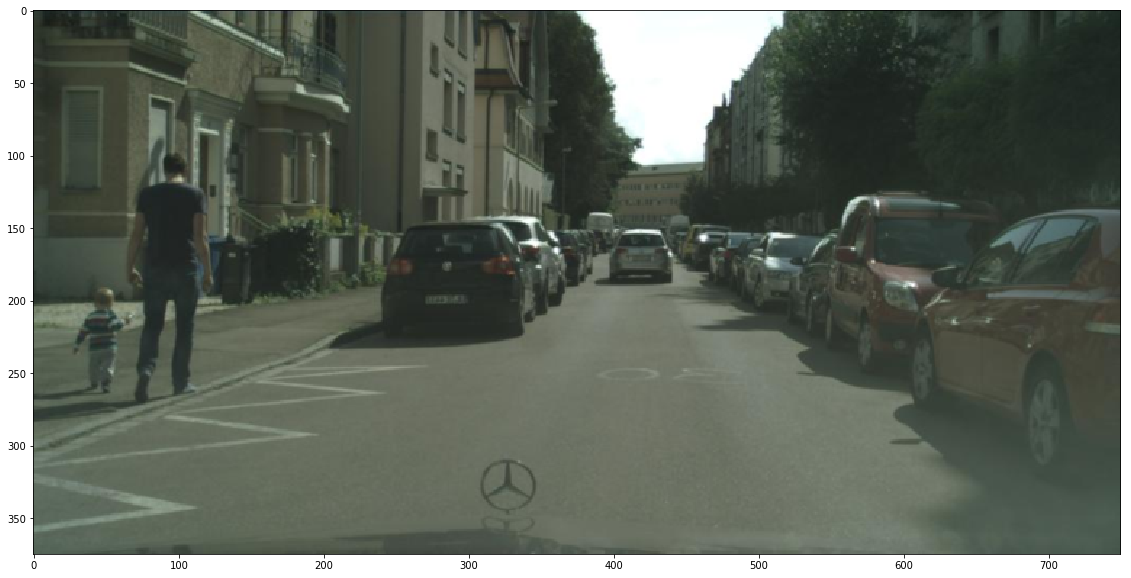

In [92]:
mask.shape
import scipy.signal
convolved = scipy.signal.convolve2d(mask.astype(int), conv.astype(int))
ring = (convolved > 2) & (convolved < (conv_size**2)/1.25) # extract a border using convolutions
#dilated_ring = scipy.signal.convolve2d(ring.astype(int), conv.astype(int)) > 0
#dilated_ring = ring
cut = int(conv_size/2)
ring = ring[cut:-cut, cut:-cut]
#print(dilated_ring.shape, orig_resized.shape)
#dilated_ring_cutoff = dilated_ring & ~mask
copy = resized_img.copy()
#ring_cut = int(cut/2)
#convolved = convolved[ring_cut:-ring_cut, ring_cut:-ring_cut]
#print(convolved[dilated_ring_cutoff])
copy[ring] = 0
show_img(copy)

orig_resized2 = orig_resized.copy()
show_img(orig_resized2)
plt.show()
c = convolved[cut:-cut, cut:-cut]
print(c.shape)
stacked = np.vstack([c[ring], c[ring], c[ring]]).T
stacked = stacked
stacked = stacked / stacked.max()
stacked = (stacked - 0.5)**3
stacked = stacked - stacked.min()
stacked = stacked/stacked.max()
plt.hist(stacked.reshape(-1))
plt.show()
print(stacked.max())
orig_resized3 = resized_img.copy() 
orig_resized2[ring] = stacked * orig_resized2[ring] + (1-stacked) * orig_resized3[ring]

show_img(orig_resized2)
show_img(orig_resized3)
plt.show()

In [ ]:
"""
Explore which images correspond to maximum style activation for a given layer of the VGG network
"""

# st = style_transfer.NeuralStyleTransfer(style_weight=100, total_variation_weight=0.0, content_weight=0.0)

# for i in range(0, 22):
#     print(i)
#     blank_img = resized_img.copy()
#     blank_img[:] = 255
#     blank_restyled = st.transfer(blank_img, style_image, target_width=target_width, iters_override=10, layers=[i])
#     show_img(blank_img, figsize=(10,5))
#     show_img(blank_restyled, figsize=(10,5))
#     plt.show()

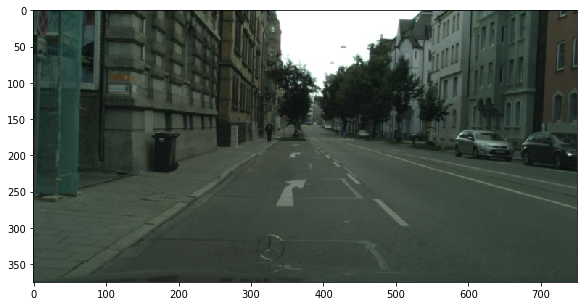

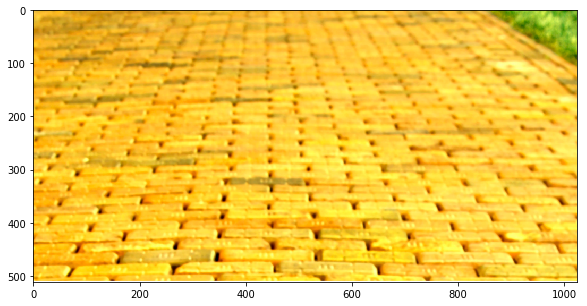

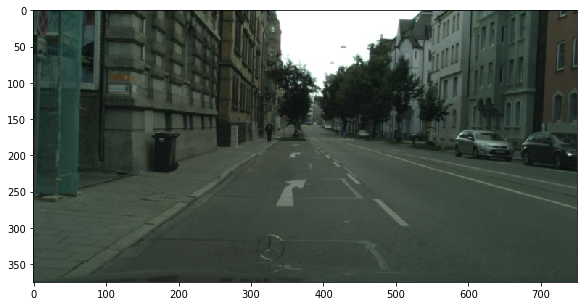

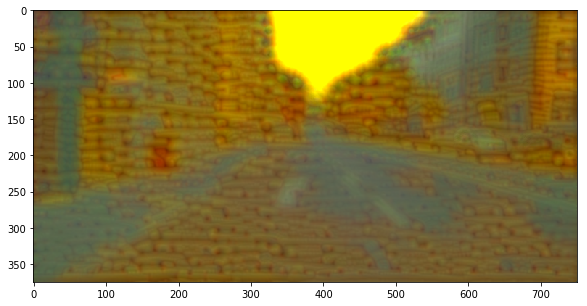

In [25]:
show_img(resized_img, figsize=(10,5))
show_img(style_image, figsize=(10,5))
show_img(black_out, figsize=(10,5))
show_img(black_out_transferred, figsize=(10,5))

(375, 750) (375, 750, 3) (375, 750, 3)


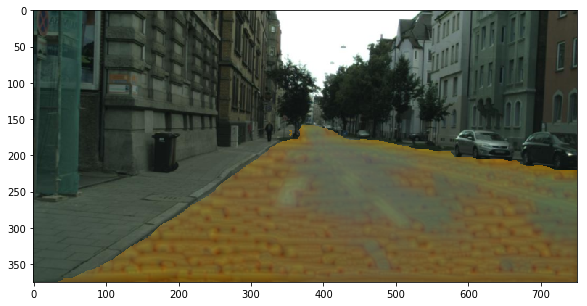

In [26]:
print(mask.shape, black_out_transferred.shape, resized_img.shape)
restyled_copy = black_out_transferred.copy()
#resized_img_copy[~mask] = 0
orig_resized = resized_img.copy()
orig_resized[mask] = restyled_copy[mask]
show_img(orig_resized, figsize=(10,5))

In [27]:


# show_img(style_image)
# show_img(img)
transferred = st.transfer(img, style_image, target_width=target_width, iters_override=iters)


375 750
Model loaded.
Start of iteration 0
Current loss value: 1135236000000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 6s
Start of iteration 1
Current loss value: 727006600000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 5s
Start of iteration 2
Current loss value: 579209100000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 6s
Start of iteration 3
Current loss value: 497647000000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 6s
Start of iteration 4
Current loss value: 438736060000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 6s
Start of iteration 5
Current loss value: 397145150000.0
Image saved as restyled_at_iteration_5.png
Iteration 5 completed in 6s
Start of iteration 6
Current loss value: 358580800000.0
Image saved as restyled_at_iteration_6.png
Iteration 6 completed in 6s
Start of iteration 7
Current loss value: 329742750000.0
Image saved as restyled_at_itera

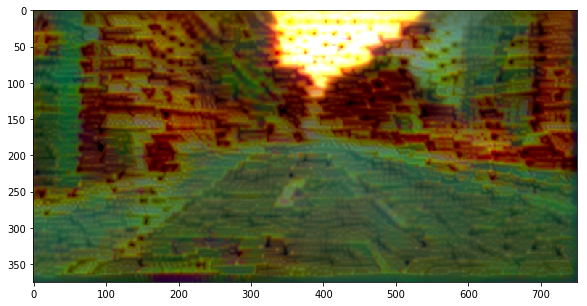

In [28]:
show_img(transferred, figsize=(10,5))

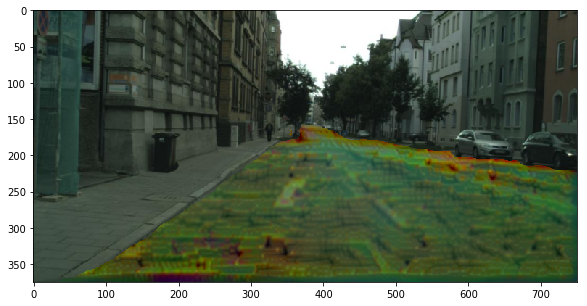

In [29]:
restyled_copy = transferred.copy()
#resized_img_copy[~mask] = 0
orig_resized = resized_img.copy()
orig_resized[mask] = restyled_copy[mask]

show_img(orig_resized, figsize=(10,5))

In [30]:
# experiment with masking out the original image black in areas we don't want it
# then use that as the style image!
original_copy = resized_img.copy()
resized_image_copy = resized_img.copy()
resized_image_copy[~mask] = 0
inverse_transferred = st.transfer(style_image, style=resized_image_copy, target_width=target_width, iters_override=iters)

375 750
Model loaded.
Start of iteration 0
Current loss value: 481857180000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 6s
Start of iteration 1
Current loss value: 371169530000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 6s
Start of iteration 2
Current loss value: 328653670000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 6s
Start of iteration 3
Current loss value: 307424500000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 6s
Start of iteration 4
Current loss value: 295094940000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 6s
Start of iteration 5
Current loss value: 286408600000.0
Image saved as restyled_at_iteration_5.png
Iteration 5 completed in 6s
Start of iteration 6
Current loss value: 280122200000.0
Image saved as restyled_at_iteration_6.png
Iteration 6 completed in 6s
Start of iteration 7
Current loss value: 275517830000.0
Image saved as restyled_at_iterat

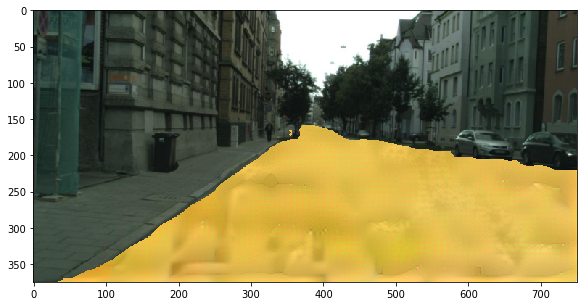

In [31]:
original_copy[mask] = inverse_transferred[mask]
show_img(original_copy, figsize=(10,5))

0.1 0.1 200.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 27601957000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 25826333000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 24762565000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 23324137000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 20232602000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


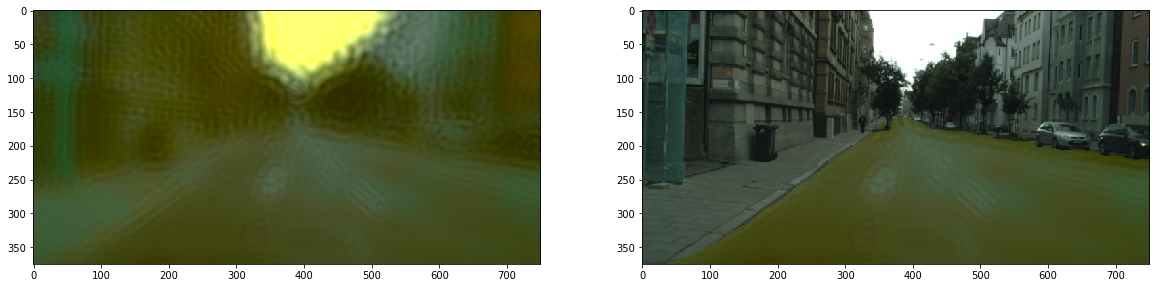

0.1 1.6 200.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 330389700000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 45344410000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 20493584000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 11030944000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 8088958000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


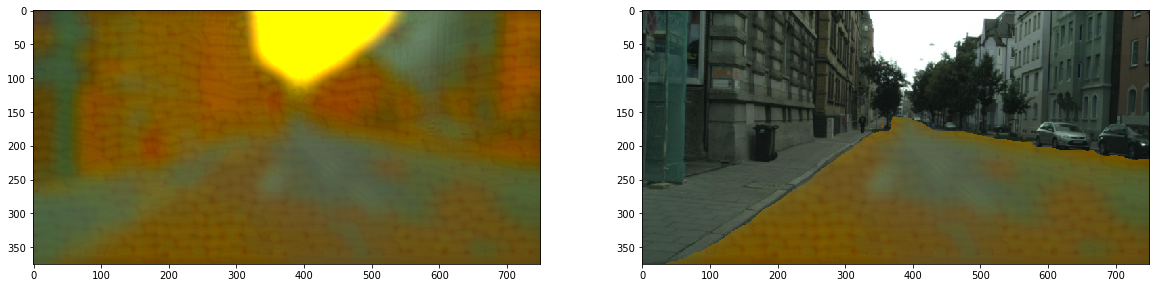

2.1 0.1 200.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 28049891000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 26321232000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 25733240000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 25126816000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 24449761000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


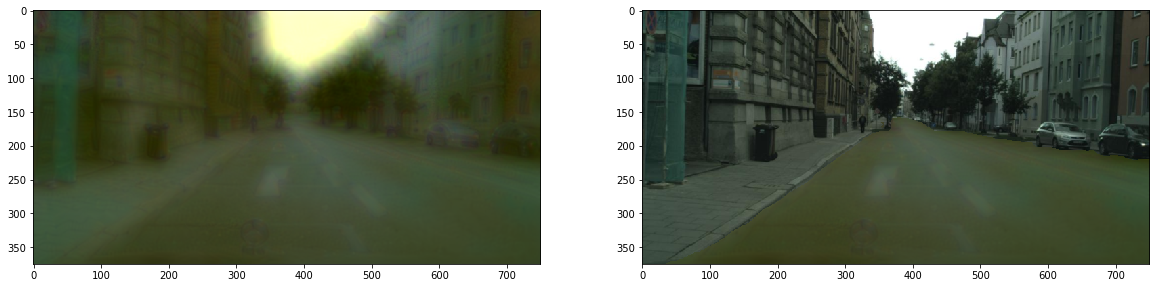

2.1 1.6 200.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 329408900000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 42918015000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 21256237000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 12262959000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 9353044000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


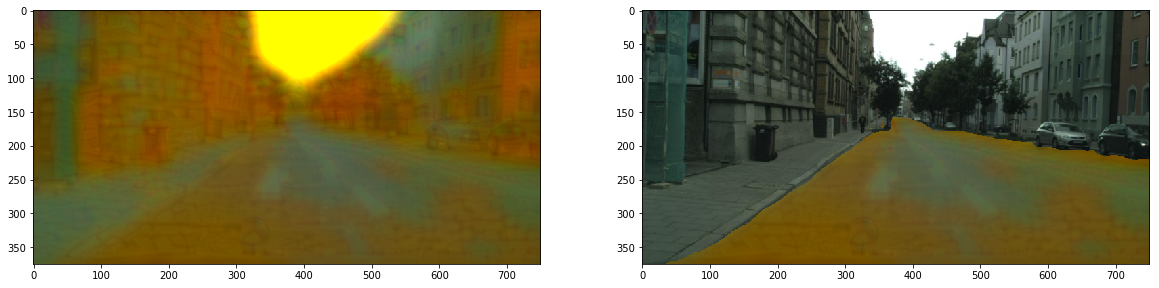

4.1 0.1 200.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 28375160000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 26887318000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 26455290000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 26132898000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 25826580000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


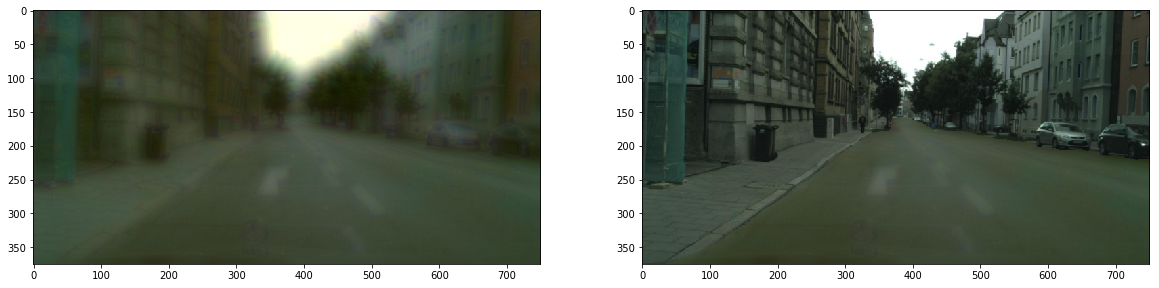

4.1 1.6 200.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 326496320000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 47815614000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 22072470000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 13026337000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 10341614000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


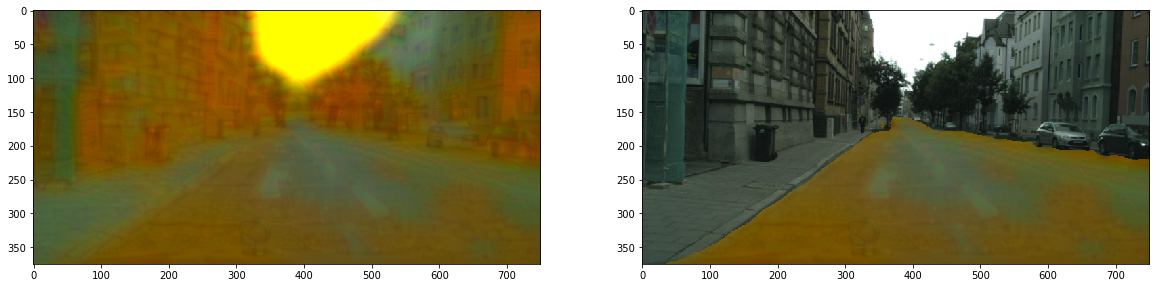

0.1 0.1 250.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 28135610000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 26127660000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 25273790000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 24294023000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 22824251000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


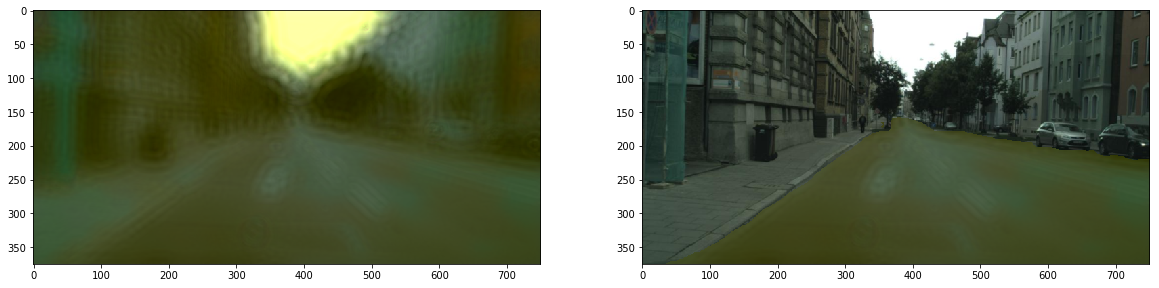

0.1 1.6 250.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 346142400000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 52527956000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 22319598000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 12936000000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4
Current loss value: 9763570000.0
Image saved as restyled_at_iteration_4.png
Iteration 4 completed in 7s


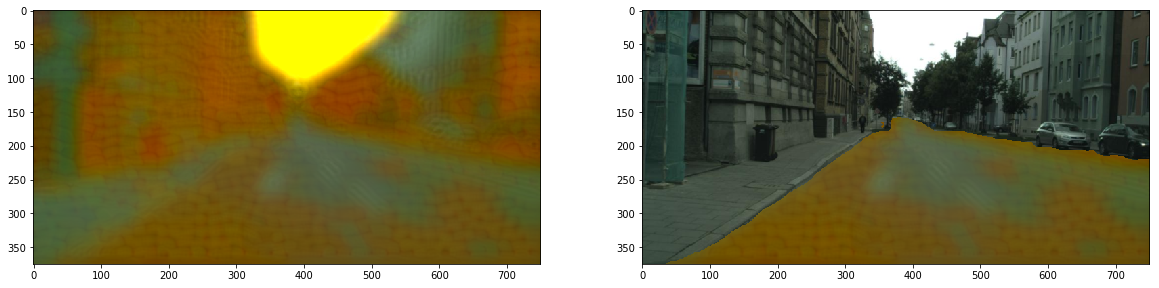

2.1 0.1 250.0
375 750
Model loaded.
Start of iteration 0
Current loss value: 28622545000.0
Image saved as restyled_at_iteration_0.png
Iteration 0 completed in 8s
Start of iteration 1
Current loss value: 26596325000.0
Image saved as restyled_at_iteration_1.png
Iteration 1 completed in 7s
Start of iteration 2
Current loss value: 26047212000.0
Image saved as restyled_at_iteration_2.png
Iteration 2 completed in 7s
Start of iteration 3
Current loss value: 25597276000.0
Image saved as restyled_at_iteration_3.png
Iteration 3 completed in 7s
Start of iteration 4


In [ ]:
import keras_neural_style_transfer as style_transfer
from keras.preprocessing.image import load_img, img_to_array

# drawn from high level features in VGG network
# cw = 0.1
# style drawn from selected layers of the VGG network
# sw = 1.0
# overall image consistency
# tv=600.0,

# higher tv => smoothed results, not as defined

for tv in np.arange(200, 500, 50.0):
    for cw in np.arange(0.1, 6, 2):
        for sw in np.arange(0.1, 3, 1.5):
            print(cw, sw, tv)
            st = style_transfer.NeuralStyleTransfer(content_weight=cw, 
                                                    style_weight=sw,
                                                    total_variation_weight=tv)
            target = resized_img.copy()

            layer_configs = [
                #[1,2, 8,9,10,11], # GOOD starting point!
                #[0, 8, 10, 12, 14], # relatively similar

               [ 1, 2, 14,15, 17, 18], # BEST

            ]

            for config in layer_configs:
                #print("Config: ", config)
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
                restyled = st.transfer(target, style_image, target_width=target_width, 
                                       iters_override=5, layers=config)
                show_img(restyled, figsize=(6,3), ax=axes[0])
                copy = target.copy()
                copy[mask] = restyled[mask]
                show_img(copy, figsize=(6,3), ax=axes[1])
                plt.show()